#   08 October 2025

In [61]:
import numpy as np
import matplotlib.pyplot as plt

##  Multivariate Roots

We solve a system of nonlinear equations $\vec{f}(\vec{x})$ and find the system's roots, specifically 

$$\vec{f}(\vec{x}) = \vec{0}$$

We are then given the following equations: 

Eq. 5.106
$$\phi(x_0, x_1) = x_0^2 - 2x_0 + x_1^4 - 2x_1^2 +x_1$$

Eq. 5.149
$$f_0(x_0, x_1) = x_0^2 - 2x_0 - 2x_1^2 + x_1 = 0$$
$$f_1(x_0, x_1) = x_0^2 + x_0 - 2x_1^2 - 1.5x_1 - 0.05 = 0$$

Eq. 5.155
$$\phi(x_0, x_1) = (1-x_0)^2 + 100(x_1-x_0)^2$$

Eq. 5.91
$$\phi(x) = x^4 - 9x^3 + 25x^2 - 24x + 4 $$

Eq. 5.145
$$f(x) = -x^5 + 4x^4 - 4x^3 + x^2e^x - 2x^2 - 4xe^x + 8x + 4e^x - 8$$

and the gradient of a scalar field:
$$\vec{\nabla}\phi(x_0, x_1) = 
\frac{\partial \phi}{\partial x_0}\hat{x_0} + \frac{\partial \phi}{\partial x_1}\hat{x_1} 
= f_0(x_0, x_1)\hat{x_0} + f_1(x_0, x_1)\hat{x_1}$$

In [62]:
def f_5_106(x0, x1): return (x0**2) - (2*x0) + (x1**4) - (2*x1**2) + x1
def f0_5_149(x0, x1): return (x0**2) - (2*x0) + (x1**4) - (2*x1**2) + (x1)
def f1_5_149(x0, x1): return (x0**2) + (x0) + (2*x1**3) - (2*x1**2) - (1.5*x1) - 0.05
def f_5_155(x0, x1): return (1-x0)**2 + 100*(x1-x0**2)**2
def f_5_091(x): return x**4 - (9*x**3) + (25*x**2) - (24*x) + 4
def f_5_145(x): return -(x**5) + (4*x**4) - (4*x**3) + np.exp(x)*(x**2 - 4*x + 4) - (2*x**2) + (8*x) - 8

In [110]:
def nonlin_func(x = np.array([0,0])):
    ''' INPUTS
        x           1 x N dimensional array of values of independent variables x0, x1, ..., xN. 
        OUTPUTS
        f_i         array made of evaluated functions f0, f1, ..., fN at the specified x.      
    '''
    x0, x1 = x[0], x[1]
    return np.array([f0_5_149(x0, x1), f1_5_149(x0, x1)])

def grad(phi, x0, x1):
    '''
    '''    
    pass
    

#   CHECK BLOCK
#x_test = np.array([0.5, 0.6])
#print(nonlin_func(x_test))

Root found at [x0 = -0.2111366080841979 , x1 = -0.29758285676871876] => L2 = 6.938893903907228e-17
Root found at [x0 = 0.5921862733161427  , x1 = 1.3122821237162643  ] => L2 = 1.3306041476995274e-15
Root found at [x0 = -0.03268373760215168, x1 = -0.05939307153268289] => L2 = 0.0
Root found at [x0 = -0.21113660808419785, x1 = -0.2975828567687187 ] => L2 = 6.938893903907228e-17
Root found at [x0 = 0.5921862733161426  , x1 = 1.312282123716264   ] => L2 = 9.559569857539321e-16
Root found at [x0 = -0.2111366080841979 , x1 = -0.29758285676871876] => L2 = 6.938893903907228e-17
Root found at [x0 = 0.5921862733161427  , x1 = 1.3122821237162643  ] => L2 = 1.3306041476995274e-15
Root found at [x0 = -0.03268373760215168, x1 = -0.05939307153268289] => L2 = 0.0
Root found at [x0 = -0.21113660808419785, x1 = -0.2975828567687187 ] => L2 = 6.938893903907228e-17
Root found at [x0 = 0.5921862733161426  , x1 = 1.312282123716264   ] => L2 = 9.559569857539321e-16


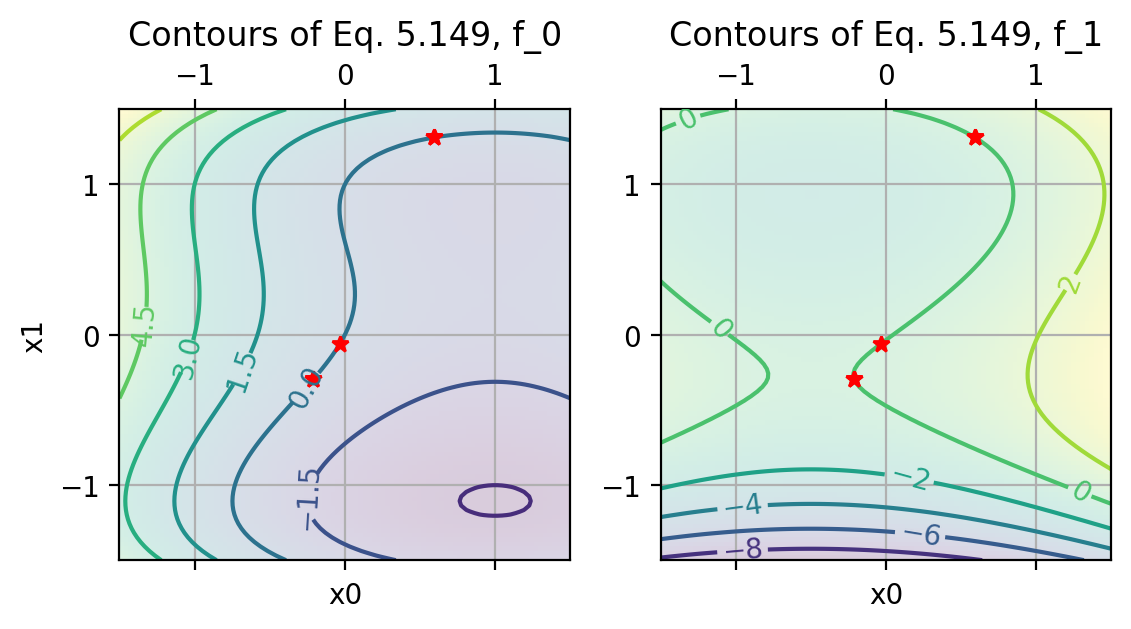

In [140]:
#   FOR VISUALIZING VECTOR FIELDS.

N = 100
bounds = np.array([-1.5, 1.5])
x = np.linspace(bounds[0], bounds[1], N)
y = np.linspace(bounds[0], bounds[1], N)
X, Y = np.meshgrid(x, y)
output = nonlin_func(np.array([X,Y]))

fig, axs = plt.subplots(1, 2, dpi = 200)
for ax in axs:
    ax.grid(True)
    ax.set_xlabel('x0')
    axs[0].set_ylabel('x1')

my_extent = [min(x), max(x), min(y), max(y)]
axs[0].matshow(output[0], origin="lower", extent=my_extent, alpha=0.2)
csx = axs[0].contour(X, Y, output[0])
axs[0].clabel(csx)
axs[0].set_title('Contours of Eq. 5.149, f_0')

axs[1].matshow(output[1], origin="lower", extent=my_extent, alpha=0.2)
csy = axs[1].contour(X, Y, output[1])
axs[1].clabel(csy)
axs[1].set_title('Contours of Eq. 5.149, f_1')

for ax in axs:
    for x0 in [[-1, -1], [-1 , 1], [0, 0], [1, -1], [1, 1]]:
        root = multi_newton(nonlin_func, jacobian, np.array(x0))
        print(f"Root found at [x0 = {root[0]:<20}, x1 = {root[1]:<20}] => L2 = {np.linalg.norm(nonlin_func(root))}")
        ax.plot(root[0], root[1], 'r*')

fig1 = fig.figure
plt.show()

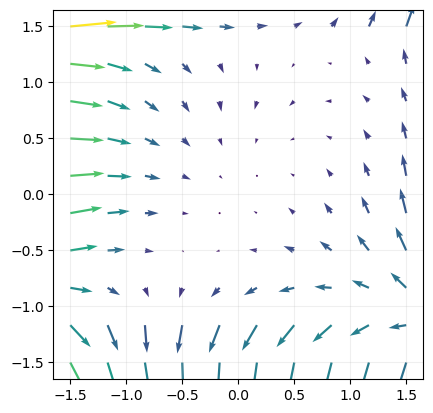

In [109]:
N = 10
bounds = np.array([-1.5, 1.5])
x = np.linspace(bounds[0], bounds[1], N)
y = np.linspace(bounds[0], bounds[1], N)
X, Y = np.meshgrid(x, y)
output = nonlin_func(np.array([X,Y]))

fig2, ax = plt.subplots(1, dpi=100)

mag = np.sqrt(output[0]**2 + np.sqrt(output[1]**2))
ax.quiver(X, Y, output[0], output[1], mag)
ax.grid(alpha=0.2)
ax.set_aspect('equal')
fig2 = fig.figure
plt.show()

In [86]:
def jacobian(vec_fld, x, h=1E-6):
    ''' INPUTS
        vec_fld             the input function where values of x are evaluated
        x                   an array of values to be used
        h                   minute interval
        
        WITHIN
        n                   size/length of the x array
        iden                n x n identity matrix
        fs0                 function value at x
        fs1                 adds the j-th column * h to the x vector. 
                            The result is an evaluation at a certain interval h away from the original value of the j-th entry in x.
        Jf[:,j]             returns the forward-difference derivative 

        OUTPUTS
        Jf                  n x n matrix that returns the Jacobian matrix
        fs0                 The evaluated function values at values of x
    '''
    n = x.size
    Jf = np.zeros(shape=(n,n))
    iden = np.eye(n)
    fs0 = vec_fld(x)

    for j in range(n):
        fs1 = vec_fld(x+iden[:, j]*h)
        Jf[:, j] = (fs1 - fs0)/h

    return Jf, fs0

In [115]:
#   NEWTON'S METHOD FOR MULTIVARIATE FUNCTIONS
def multi_newton(input_func, jac, xolds, kmax=500):
    ''' INPUTS
        input_func          the input function where a value of xolds is evaluated.
        xolds               an array containing defined values of x.
        kmax                maximum number of iterations, for us to have a stopping rule.
    
        WITHIN
        Jf, fs_xolds        the returned values of the jacobian() function.
            Jf              the estimated Jacobian matrix of input_func
            fs_xolds        the evaluated function values at values of xolds
        xnews               creates the new values of x

        OUTPUTS
        xnews               
    '''
    for k in range(1, kmax):
        Jf, fs_xolds = jac(input_func, xolds)
        xnews = xolds + np.linalg.solve(Jf, -fs_xolds)
        xolds = np.copy(xnews)

    return xnews

root = multi_newton(nonlin_func, jacobian, np.array([1., 1.]))
root_loc = f'Root found at {root}'
root_val = f'f({root}) is {nonlin_func(root)}'
print(root_loc)
print(root_val)

Root found at [0.59218627 1.31228212]
f([0.59218627 1.31228212]) is [-4.44089210e-16 -8.46545056e-16]


Recall that for any multivariable function, we can get a slice of any plane and see its intersection with that function. This is the graphical representation of substituting value(s) to the inputs xor the output.

- [ ] Find the root(s) of the *gradient* of Eq. 5.106
- [ ] Find root(s) of Eq. 5.149
- [ ] Find root(s) of the *gradient* of Eq. 5.155

>   What does it mean to find the **roots of the gradient of a scalar field**?

In [85]:
#   Find the root(s) of Eq. 5.149
N = 100
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
root_5_149 = multi_newton(f1_5_149, jacobian, x)

TypeError: f1_5_149() missing 1 required positional argument: 'x1'